# XGBoost Enar Datafest

dataset function reference: https://jhs-hwg.github.io/cardioStatsUSA/reference/index.html


## Load Data

In [1]:
# !pip install jupyter_ai
# !pip install openai

In [3]:
# make sure: Python 3.8 - 3.11, JupyterLab 4
!pip list | grep jupyterlab

jupyterlab                    4.0.5
jupyterlab-pygments           0.2.2
jupyterlab_server             2.24.0


In [4]:
! python --version

Python 3.9.17


In [5]:
# !pip install xgboost
# !pip install pyreadr

In [6]:
import pyreadr
# Load the RDA file
data_rda = pyreadr.read_r('./data/nhanes_data.rda')
dataframe = data_rda['nhanes_data']
dataframe

,svy_id,svy_weight_mec,svy_psu,svy_strata,svy_year,svy_subpop_htn,svy_subpop_chol,demo_age_cat,demo_race,demo_race_black,...,cc_smoke,cc_bmi,cc_diabetes,cc_ckd,cc_cvd_mi,cc_cvd_chd,cc_cvd_stroke,cc_cvd_ascvd,cc_cvd_hf,cc_cvd_any
0,12.0,95494.214052,2.0,6.0,1999-2000,1.0,1.0,18 to 44,Non-Hispanic White,No,...,Never,30 to <35,No,Yes,No,No,No,No,No,No
1,21.0,2910.629731,2.0,3.0,1999-2000,1.0,1.0,18 to 44,Hispanic,No,...,NaN,35+,No,No,NaN,NaN,NaN,No,NaN,No
2,27.0,1935.098080,2.0,13.0,1999-2000,1.0,0.0,18 to 44,Hispanic,No,...,NaN,25 to <30,No,No,NaN,NaN,NaN,No,NaN,No
3,28.0,41107.191290,2.0,1.0,1999-2000,1.0,1.0,18 to 44,Non-Hispanic White,No,...,NaN,<25,No,No,NaN,NaN,NaN,No,NaN,No
4,56.0,89768.526365,1.0,12.0,1999-2000,1.0,0.0,18 to 44,Non-Hispanic White,No,...,Former,<25,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59794,124403.0,3857.537997,2.0,149.0,2017-2020,1.0,0.0,65 to 74,Non-Hispanic Black,Yes,...,Never,35+,No,No,No,No,No,No,No,No
59795,124542.0,8560.185177,2.0,171.0,2017-2020,1.0,0.0,65 to 74,Non-Hispanic Black,Yes,...,Current,<25,No,No,No,No,No,No,No,No
59796,124755.0,7394.157262,1.0,171.0,2017-2020,1.0,0.0,75+,Non-Hispanic Black,Yes,...,Never,<25,No,No,No,No,No,No,No,No
59797,124784.0,11188.828922,2.0,170.0,2017-2020,1.0,0.0,75+,Non-Hispanic Black,Yes,...,Never,30 to <35,No,Yes,No,No,No,No,No,No


In [7]:
dataframe.describe()

,svy_id,svy_weight_mec,svy_psu,svy_strata,svy_subpop_htn,svy_subpop_chol,demo_age_years,bp_sys_mean,bp_dia_mean,chol_total,chol_hdl,chol_trig,chol_ldl,chol_nonhdl
count,59799.000000,59799.000000,59799.000000,59799.000000,59799.000000,59799.000000,59799.000000,56534.000000,56286.000000,25203.000000,25204.000000,25178.000000,25178.000000,25203.000000
mean,58294.935450,37534.813342,1.527400,81.518019,0.936755,0.420592,47.458670,124.125267,70.318886,192.491846,53.583598,128.654778,113.928962,138.907908
std,34964.350225,33272.958982,0.532041,48.578936,0.243406,0.493658,19.112562,19.397019,12.107088,42.561287,15.889536,114.262554,38.826642,42.374758
min,2.000000,1222.601178,1.000000,1.000000,0.000000,0.000000,18.000000,64.666667,3.333333,69.000000,6.000000,10.000000,-1030.063582,23.000000
25%,29380.500000,14775.048884,1.000000,40.000000,1.000000,0.000000,31.000000,110.666667,62.666667,163.000000,42.000000,71.000000,89.087226,109.000000
50%,56171.000000,25473.331069,2.000000,80.000000,1.000000,0.000000,47.000000,120.666667,70.366667,189.000000,51.000000,103.000000,111.898270,135.000000
75%,83307.000000,50241.567044,2.000000,118.000000,1.000000,1.000000,63.000000,134.000000,78.000000,218.000000,62.000000,153.000000,136.579103,164.000000
max,124822.000000,367555.742979,3.000000,172.000000,1.000000,1.000000,80.000000,270.000000,142.366667,650.000000,226.000000,4233.000000,366.131422,596.000000


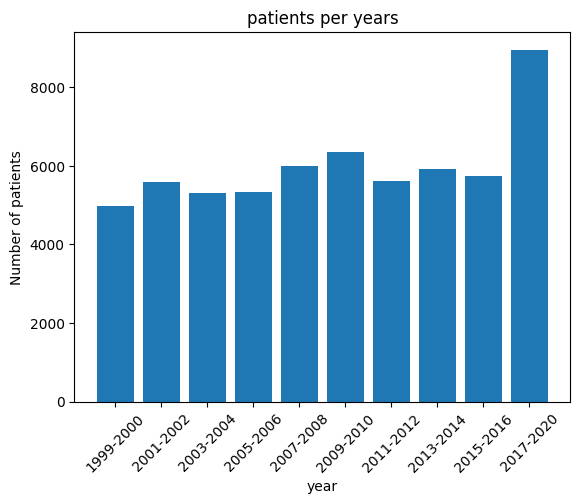

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line if you're loading data from a CSV file
# Let's assume df is your DataFrame and 'category_column' is your categorical column

# Count the occurrences of each category
category_counts = dataframe['svy_year'].value_counts().sort_index()

# Plotting
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('year')
plt.ylabel('Number of patients')
plt.title('patients per years')
plt.xticks(rotation=45)  # Rotates the category names for better readability
plt.show()

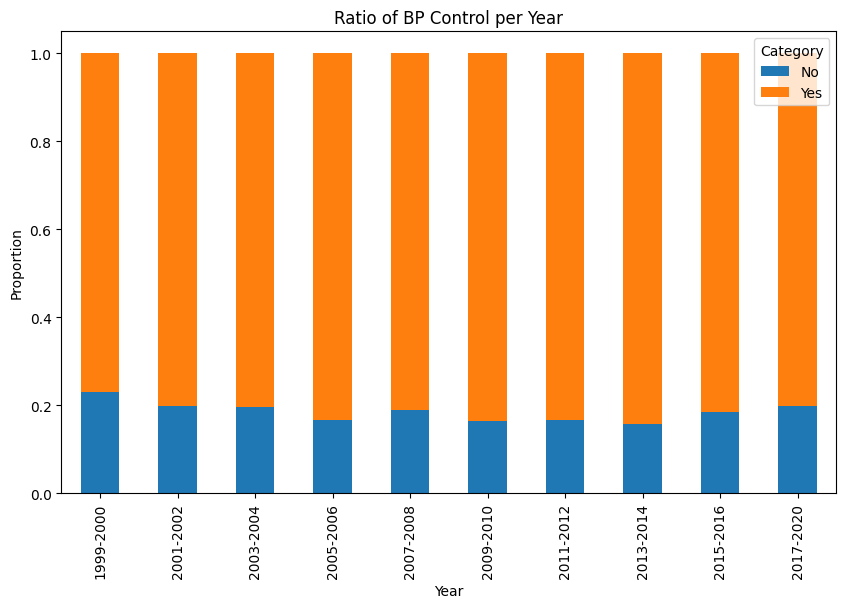

In [9]:
# Calculate the count of each category per year
category_counts = dataframe.groupby(['svy_year', 'bp_control_140_90']).size().unstack(fill_value=0)

# Calculate the proportions
category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)

category_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Ratio of BP Control per Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Category')
plt.show()

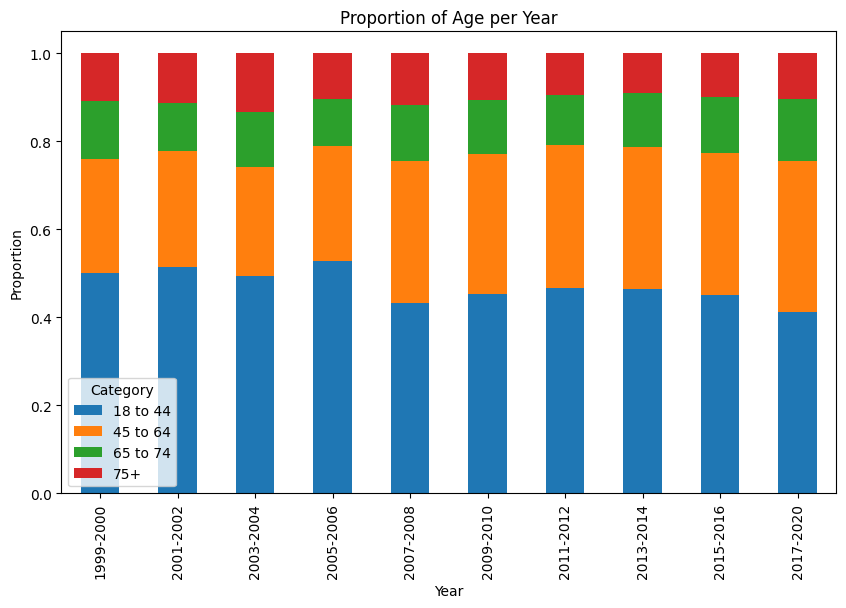

In [10]:
# Calculate the count of each category per year
category_counts = dataframe.groupby(['svy_year', 'demo_age_cat']).size().unstack(fill_value=0)

# Calculate the proportions
category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)

category_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Proportion of Age per Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Category')
plt.show()

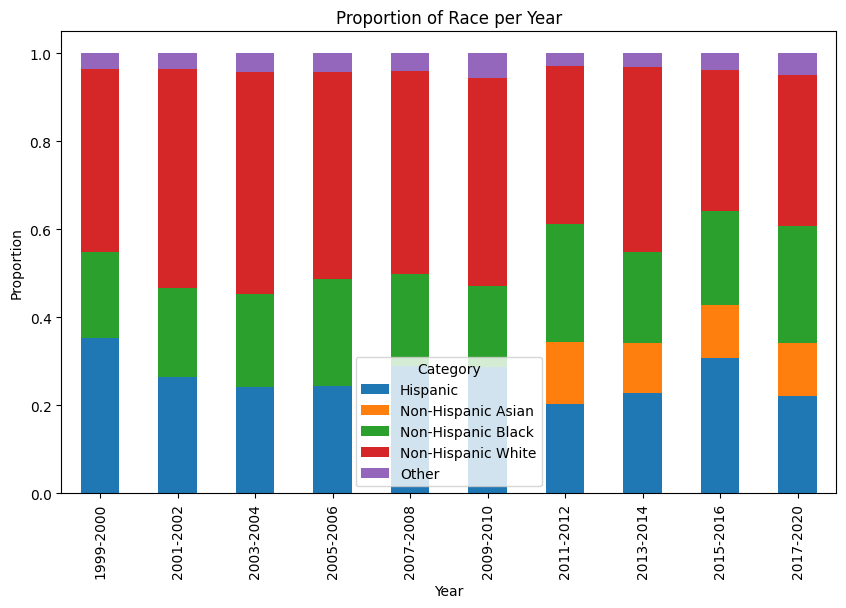

In [11]:
# Calculate the count of each category per year
category_counts = dataframe.groupby(['svy_year', 'demo_race']).size().unstack(fill_value=0)

# Calculate the proportions
category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)

category_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Proportion of Race per Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Category')
plt.show()

## data understanding
nhanes_key
NHANES Variables: Names, Roles, and Descriptions

In [12]:
key_rda = pyreadr.read_r('./data/nhanes_key.rda')
key_df = key_rda['nhanes_key']
key_df

,class,variable,label,source,type,outcome,group,subset,stratify,module,description
0,Survey,svy_id,Participant identifier,DEMO,svy,False,False,False,False,none,NHANES participant unique identifier.
1,Survey,svy_psu,Primary sampling unit,DEMO,svy,False,False,False,False,none,Population sampling unit. This variable is use...
2,Survey,svy_strata,Strata,DEMO,svy,False,False,False,False,none,Population stratification. This variable is us...
3,Survey,svy_weight_mec,Mobile examination center weights,DEMO,svy,False,False,False,False,none,Weight applied to produce statistical estimate...
4,Survey,svy_weight_cal,Calibrated mobile examination center weights,Derived,svy,False,False,False,False,none,Weight applied to produce statistical estimate...
...,...,...,...,...,...,...,...,...,...,...,...
106,Cholesterol-lowering medication,chol_med_addon_use,Taking add-on lipid-lowering therapy (ezetimib...,RXQ,bnry,True,True,True,True,chol,NaN
107,Cholesterol-lowering medication,chol_med_addon_recommended_ahaacc,Recommended add-on lipid-lowering therapy by t...,Derived,bnry,True,True,True,True,chol,NaN
108,Cholesterol-lowering medication,chol_med_statin_recommended_ahaacc,Recommended a statin by the 2018 AHA/ACC guide...,Derived,bnry,True,True,True,True,chol,NaN
109,Cholesterol-lowering medication,chol_med_recommended_ever,Ever been told to take cholesterol-lowering me...,BPQ,bnry,True,True,True,True,chol,NaN


### Data understanding key guide
guide to making keys

In [13]:
key_guide_rda = pyreadr.read_r('./data/key_guide.rda')
key_guide_df = key_guide_rda['key_guide']
key_guide_df

,name,type,required,purpose
0,class,character,True,divide variables into classes
1,variable,character,True,variable name in NHANES data
2,label,character,True,label to present in results
3,source,character,False,indicate where this variable is from
4,type,character,True,variable type impacts summary results
5,outcome,logical,True,indicate if variable is an outcome
6,group,logical,True,indicate if variable is a grouper
7,subset,logical,True,indicate if variable is a subsetter
8,stratify,logical,True,indicate if variable is a stratifier
9,module,character,False,indicate what module this variable belongs to


In [14]:
missing_values_count = dataframe.isna().sum()

print(missing_values_count)

svy_id               0
svy_weight_mec       0
svy_psu              0
svy_strata           0
svy_year             0
                  ... 
cc_cvd_chd        4216
cc_cvd_stroke     4196
cc_cvd_ascvd         0
cc_cvd_hf         4293
cc_cvd_any           0
Length: 111, dtype: int64


## visualize missing value

<Axes: >

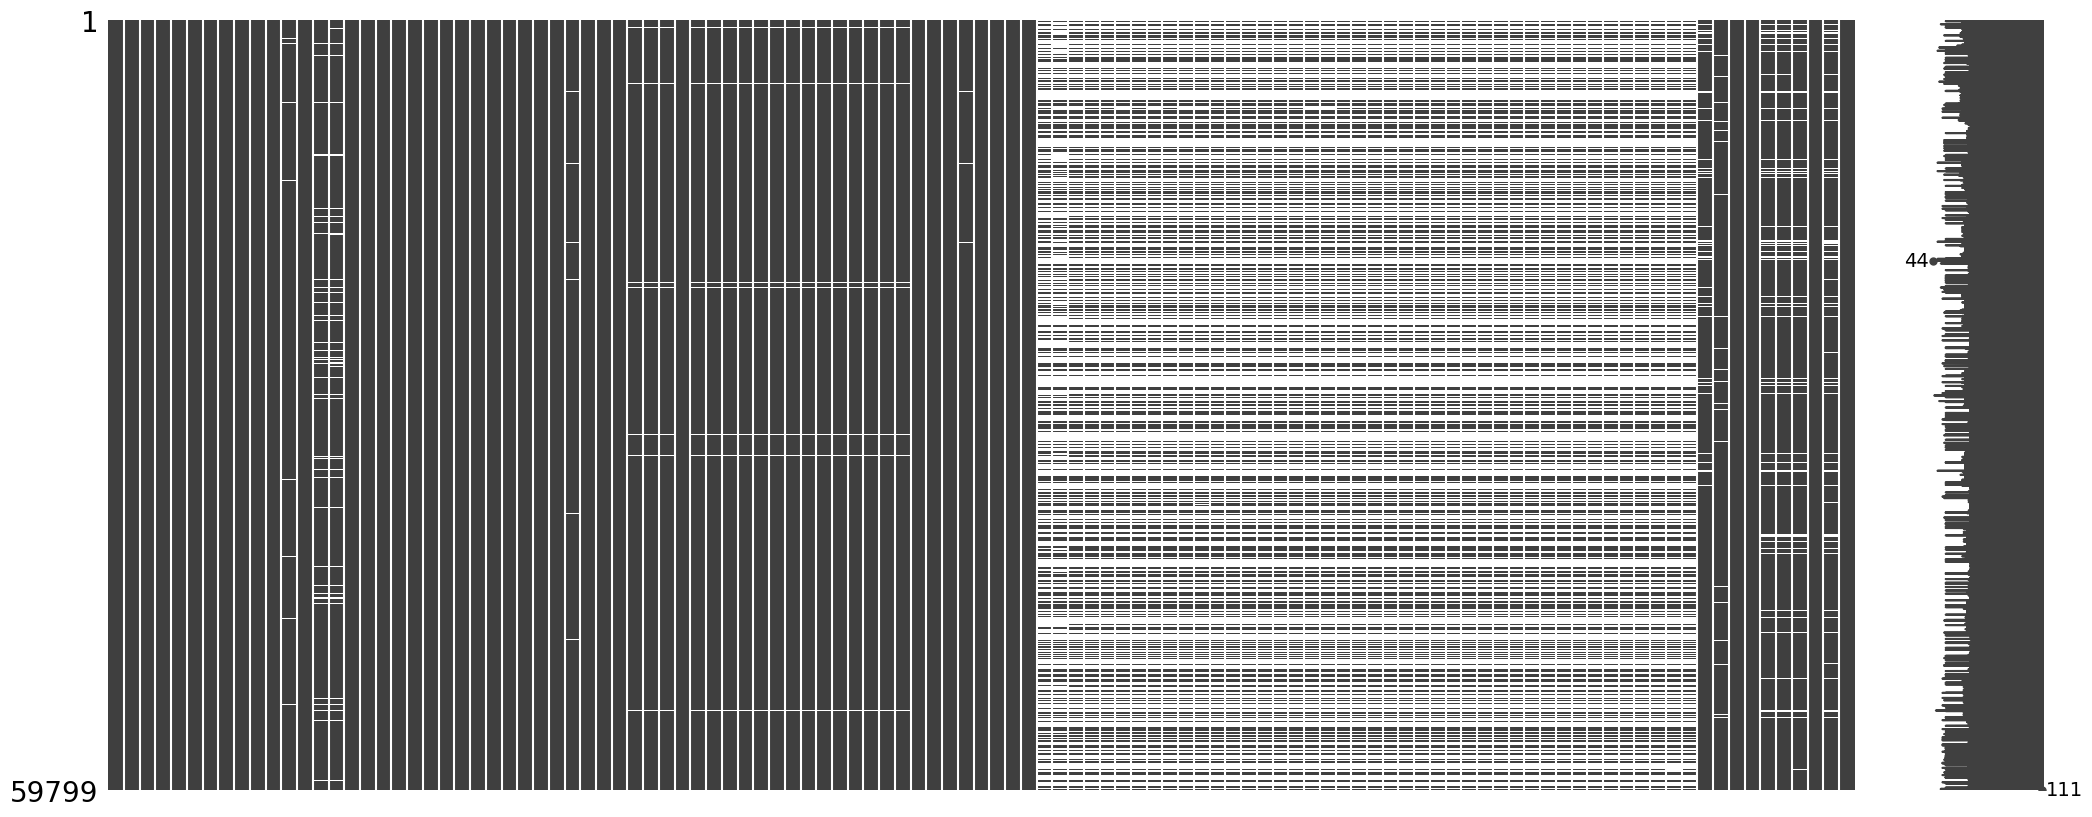

In [15]:
import missingno as msno
msno.matrix(dataframe)

## group dataset columns by prefix
In dataset description, we have several group of data

In [16]:
# Group columns by prefix
from collections import defaultdict

grouped_columns = defaultdict(list)
for col in dataframe.columns:
    prefix = col.split('_')[0]
    prefix2 = col.split('_')[1]
    if prefix2 == "med":
        if prefix+'_'+prefix2 in grouped_columns:
            grouped_columns[prefix+'_'+prefix2].append(col)
        else:
            grouped_columns[prefix+'_'+prefix2] = [col]
    elif prefix in grouped_columns:
        grouped_columns[prefix].append(col)
    else:
        grouped_columns[prefix] = [col]

# print(grouped_columns)
# Now grouped_columns dictionary has the columns grouped by their prefix
for k, v in grouped_columns.items():
    print(k, v)
# print(grouped_columns)

# # Example operation: Summing values in each group of columns
# for prefix, cols in grouped_columns.items():
#     df[prefix + '_total'] = df[cols].sum(axis=1)

# print(df)

svy ['svy_id', 'svy_weight_mec', 'svy_psu', 'svy_strata', 'svy_year', 'svy_subpop_htn', 'svy_subpop_chol']
demo ['demo_age_cat', 'demo_race', 'demo_race_black', 'demo_age_years', 'demo_pregnant', 'demo_gender']
bp ['bp_sys_mean', 'bp_dia_mean', 'bp_cat_meds_excluded', 'bp_cat_meds_included', 'bp_control_jnc7', 'bp_control_accaha', 'bp_control_escesh_1', 'bp_control_escesh_2', 'bp_control_140_90', 'bp_control_130_80', 'bp_uncontrolled_jnc7', 'bp_uncontrolled_accaha', 'bp_uncontrolled_escesh_1', 'bp_uncontrolled_escesh_2', 'bp_uncontrolled_140_90', 'bp_uncontrolled_130_80']
bp_med ['bp_med_use', 'bp_med_recommended_jnc7', 'bp_med_recommended_accaha', 'bp_med_recommended_escesh', 'bp_med_n_class', 'bp_med_n_pills', 'bp_med_combination', 'bp_med_pills_gteq_2', 'bp_med_ace', 'bp_med_aldo', 'bp_med_alpha', 'bp_med_angioten', 'bp_med_beta', 'bp_med_central', 'bp_med_ccb', 'bp_med_ccb_dh', 'bp_med_ccb_ndh', 'bp_med_diur_Ksparing', 'bp_med_diur_loop', 'bp_med_diur_thz', 'bp_med_renin_inhibitors

### Hypertension variables
These variables are derived according to the 2017 American College of Cardiology/American Heart Association (ACC/AHA) BP guideline and the Seventh Joint National Committee (JNC7) BP guideline.

In [17]:
dataframe[grouped_columns['htn']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59799 entries, 0 to 59798
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   htn_jnc7                  59799 non-null  category
 1   htn_accaha                59799 non-null  category
 2   htn_escesh                59799 non-null  category
 3   htn_aware                 59531 non-null  category
 4   htn_resistant_jnc7        59799 non-null  category
 5   htn_resistant_accaha      59799 non-null  category
 6   htn_resistant_jnc7_thz    59799 non-null  category
 7   htn_resistant_accaha_thz  59799 non-null  category
dtypes: category(8)
memory usage: 468.3 KB


### Antihypertensive medication variables
During the interview, the labels of medications that participants reported taking in the preceding 30 days were recorded.

In [18]:
dataframe[grouped_columns['bp_med']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59799 entries, 0 to 59798
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   bp_med_use                 59507 non-null  category
 1   bp_med_recommended_jnc7    59799 non-null  category
 2   bp_med_recommended_accaha  59799 non-null  category
 3   bp_med_recommended_escesh  59799 non-null  category
 4   bp_med_n_class             59318 non-null  category
 5   bp_med_n_pills             59318 non-null  category
 6   bp_med_combination         59318 non-null  category
 7   bp_med_pills_gteq_2        59799 non-null  category
 8   bp_med_ace                 59318 non-null  category
 9   bp_med_aldo                59318 non-null  category
 10  bp_med_alpha               59318 non-null  category
 11  bp_med_angioten            59318 non-null  category
 12  bp_med_beta                59318 non-null  category
 13  bp_med_central             5931

### Blood pressure variables
Systolic and diastolic BP (SBP and DBP, respectively) were measured three times by trained and certified physicians. BP was measured using a mercury sphygmomanometer from 1999-2000 through 2015-2016 and using an oscillometric device in 2017-2020. The oscillometric SBP and DBP values were calibrated to the mercury device. Mean SBP and DBP levels were computed over all available

In [19]:
dataframe[grouped_columns['bp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59799 entries, 0 to 59798
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bp_sys_mean               56534 non-null  float64 
 1   bp_dia_mean               56286 non-null  float64 
 2   bp_cat_meds_excluded      59799 non-null  category
 3   bp_cat_meds_included      59799 non-null  category
 4   bp_control_jnc7           59799 non-null  category
 5   bp_control_accaha         59799 non-null  category
 6   bp_control_escesh_1       59799 non-null  category
 7   bp_control_escesh_2       59799 non-null  category
 8   bp_control_140_90         59799 non-null  category
 9   bp_control_130_80         59799 non-null  category
 10  bp_uncontrolled_jnc7      59799 non-null  category
 11  bp_uncontrolled_accaha    59799 non-null  category
 12  bp_uncontrolled_escesh_1  59799 non-null  category
 13  bp_uncontrolled_escesh_2  59799 non-null  cate

### Cholesterol

In [20]:
dataframe[grouped_columns['chol']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59799 entries, 0 to 59798
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   chol_measured_never   24806 non-null  category
 1   chol_measured_last    23357 non-null  category
 2   chol_total            25203 non-null  float64 
 3   chol_total_gteq_200   25504 non-null  category
 4   chol_total_gteq_240   25504 non-null  category
 5   chol_hdl              25204 non-null  float64 
 6   chol_hdl_low          25504 non-null  category
 7   chol_trig             25178 non-null  float64 
 8   chol_trig_gteq_150    25504 non-null  category
 9   chol_ldl              25178 non-null  float64 
 10  chol_ldl_5cat         25134 non-null  category
 11  chol_ldl_lt_70        25504 non-null  category
 12  chol_ldl_gteq_70      25504 non-null  category
 13  chol_ldl_lt_100       25504 non-null  category
 14  chol_ldl_gteq_100     25504 non-null  category
 15  ch

### Cholesterol medication variables

In [21]:
dataframe[grouped_columns['chol_med']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59799 entries, 0 to 59798
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   chol_med_use                        25504 non-null  category
 1   chol_med_use_sr                     25477 non-null  category
 2   chol_med_statin                     25504 non-null  category
 3   chol_med_ezetimibe                  25504 non-null  category
 4   chol_med_pcsk9i                     25504 non-null  category
 5   chol_med_bile                       25504 non-null  category
 6   chol_med_fibric_acid                25504 non-null  category
 7   chol_med_atorvastatin               25504 non-null  category
 8   chol_med_simvastatin                25504 non-null  category
 9   chol_med_rosuvastatin               25504 non-null  category
 10  chol_med_pravastatin                25504 non-null  category
 11  chol_med_pitavastatin       

### Comorbidities variables
These variables describe comorbid conditions.

In [22]:
dataframe[grouped_columns['cc']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59799 entries, 0 to 59798
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   cc_smoke       56640 non-null  category
 1   cc_bmi         58221 non-null  category
 2   cc_diabetes    59799 non-null  category
 3   cc_ckd         59799 non-null  category
 4   cc_cvd_mi      55586 non-null  category
 5   cc_cvd_chd     55583 non-null  category
 6   cc_cvd_stroke  55603 non-null  category
 7   cc_cvd_ascvd   59799 non-null  category
 8   cc_cvd_hf      55506 non-null  category
 9   cc_cvd_any     59799 non-null  category
dtypes: category(10)
memory usage: 585.4 KB


## XGboost
### blood pressure medicine vs hypertension variables

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming 'dataframe' is your DataFrame and 'grouped_columns' is defined
# Include 'svy_year' in your features
X = pd.get_dummies(dataframe[grouped_columns['bp_med'] + ['svy_year']], columns=grouped_columns['bp_med'] + ['svy_year'])
y = pd.get_dummies(dataframe[grouped_columns['htn']], columns=grouped_columns['htn'])

# Iterate over each year
for year in dataframe['svy_year'].unique():
    X_year = X[dataframe['svy_year'] == year]
    y_year = y[dataframe['svy_year'] == year]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_year, y_year, test_size=0.2)

    # Train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror')  # Use XGBClassifier if y is categorical
    model.fit(X_train, y_train)

    # Feature importance
    importance = model.feature_importances_
    print(f'Year: {year}')
    for i, col in enumerate(X_train.columns):
        print(f'Importance of {col}: {importance[i]}')

Year: 1999-2000
Importance of bp_med_use_No: 0.026236752048134804
Importance of bp_med_use_Yes: 0.1806337684392929
Importance of bp_med_recommended_jnc7_No: 0.0038877998013049364
Importance of bp_med_recommended_jnc7_Yes: 0.0
Importance of bp_med_recommended_accaha_No: 0.19371968507766724
Importance of bp_med_recommended_accaha_Yes: 0.0
Importance of bp_med_recommended_escesh_No: 0.5609974265098572
Importance of bp_med_recommended_escesh_Yes: 0.0
Importance of bp_med_n_class_Four or more: 0.007950610481202602
Importance of bp_med_n_class_None: 0.0024000301491469145
Importance of bp_med_n_class_One: 0.00016553689783904701
Importance of bp_med_n_class_Three: 0.00771136162802577
Importance of bp_med_n_class_Two: 0.0006314021884463727
Importance of bp_med_n_pills_Four or more: 4.525374606600963e-06
Importance of bp_med_n_pills_None: 0.0
Importance of bp_med_n_pills_One: 9.752372716320679e-05
Importance of bp_med_n_pills_Three: 0.00023298304586205631
Importance of bp_med_n_pills_Two: 0.0001

In [24]:
import seaborn as sns

# Assuming 'dataframe' and 'grouped_columns' are defined
X = pd.get_dummies(dataframe[grouped_columns['bp_med'] + ['svy_year']], columns=grouped_columns['bp_med'] + ['svy_year'])
y = pd.get_dummies(dataframe[grouped_columns['htn'] + ['svy_year']], columns=grouped_columns['htn'] + ['svy_year'])

# Dictionary to store feature importances
feature_importances = {}

# Iterate over each year
for year in dataframe['svy_year'].unique():
    X_year = X[dataframe['svy_year'] == year]
    y_year = y[dataframe['svy_year'] == year]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_year, y_year, test_size=0.2)

    # Train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror')  # Use XGBClassifier if y is categorical
    model.fit(X_train, y_train)

    # Store feature importance
    feature_importances[year] = model.feature_importances_
    print(f'Year: {year}')
    for i, col in enumerate(X_train.columns):
        print(f'Importance of {col}: {importance[i]}')

Year: 1999-2000
Importance of bp_med_use_No: 0.026354700326919556
Importance of bp_med_use_Yes: 0.07568404078483582
Importance of bp_med_recommended_jnc7_No: 6.950079841772094e-05
Importance of bp_med_recommended_jnc7_Yes: 0.0
Importance of bp_med_recommended_accaha_No: 0.28516650199890137
Importance of bp_med_recommended_accaha_Yes: 0.0
Importance of bp_med_recommended_escesh_No: 0.5653574466705322
Importance of bp_med_recommended_escesh_Yes: 0.0
Importance of bp_med_n_class_Four or more: 0.015538742765784264
Importance of bp_med_n_class_None: 0.0005808104760944843
Importance of bp_med_n_class_One: 0.0003627697587944567
Importance of bp_med_n_class_Three: 0.006106644403189421
Importance of bp_med_n_class_Two: 0.00010781447781482711
Importance of bp_med_n_pills_Four or more: 2.0691720692411764e-06
Importance of bp_med_n_pills_None: 0.0
Importance of bp_med_n_pills_One: 3.905057383235544e-05
Importance of bp_med_n_pills_Three: 0.00017076470248866826
Importance of bp_med_n_pills_Two: 8.7

### Cholesterol medication vs hypertension variables

In [25]:
X = pd.get_dummies(dataframe[grouped_columns['chol_med']], columns=grouped_columns['chol_med'])
y = pd.get_dummies(dataframe[grouped_columns['htn']], columns=grouped_columns['htn'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Feature importance
importance = model.feature_importances_
for i, col in enumerate(X_train.columns):
    print(f'Importance of {col}: {importance[i]}')

Importance of chol_med_use_No: 0.12955115735530853
Importance of chol_med_use_Yes: 0.35014739632606506
Importance of chol_med_use_sr_No: 0.003412199206650257
Importance of chol_med_use_sr_Yes: 0.07161855697631836
Importance of chol_med_statin_No: 0.003606822807341814
Importance of chol_med_statin_Yes: 0.0034608030691742897
Importance of chol_med_ezetimibe_No: 0.0010322777088731527
Importance of chol_med_ezetimibe_Yes: 0.00044073036406189203
Importance of chol_med_pcsk9i_No: 0.06454893946647644
Importance of chol_med_pcsk9i_Yes: 9.524136112304404e-05
Importance of chol_med_bile_No: 0.0047548389993608
Importance of chol_med_bile_Yes: 0.0001054520980687812
Importance of chol_med_fibric_acid_No: 0.0010554566979408264
Importance of chol_med_fibric_acid_Yes: 0.0005556450923904777
Importance of chol_med_atorvastatin_No: 0.0015498122666031122
Importance of chol_med_atorvastatin_Yes: 0.00038870208663865924
Importance of chol_med_simvastatin_No: 0.0014555803500115871
Importance of chol_med_simva

In [26]:
%load_ext jupyter_ai_magics

In [27]:
# Define the features and target variables
features = grouped_columns['bp_med']
targets = grouped_columns['htn']

# Split the data into training and testing sets
X = pd.get_dummies(dataframe[grouped_columns['bp_med']], columns=grouped_columns['bp_med'])
y = pd.get_dummies(dataframe[grouped_columns['htn']], columns=grouped_columns['htn'])

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create XGBoost DMatrix
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)

# Predict on the test data
predictions = model.predict(dtest)

# Evaluate the model
evaluation = model.eval(dtest)

# Output the correlation between variables and targets over years
correlation = pd.get_dummies(dataframe[grouped_columns['bp_med'] + grouped_columns['htn']+ ['svy_year']], columns=grouped_columns['bp_med'] + grouped_columns['htn']).groupby('svy_year').corr()

# Print the results in markdown format
print("## Correlation between Variables and Targets Over Years")
print()
print("### XGBoost Model Evaluation")
print()
print(f"RMSE: {evaluation}")
print()
print("### Correlation Matrix")

## Correlation between Variables and Targets Over Years

### XGBoost Model Evaluation

RMSE: [0]	eval-rmse:0.14724794179808337

### Correlation Matrix


## process as panel data

In [29]:
dataframe

,svy_id,svy_weight_mec,svy_psu,svy_strata,svy_year,svy_subpop_htn,svy_subpop_chol,demo_age_cat,demo_race,demo_race_black,...,cc_smoke,cc_bmi,cc_diabetes,cc_ckd,cc_cvd_mi,cc_cvd_chd,cc_cvd_stroke,cc_cvd_ascvd,cc_cvd_hf,cc_cvd_any
0,12.0,95494.214052,2.0,6.0,1999-2000,1.0,1.0,18 to 44,Non-Hispanic White,No,...,Never,30 to <35,No,Yes,No,No,No,No,No,No
1,21.0,2910.629731,2.0,3.0,1999-2000,1.0,1.0,18 to 44,Hispanic,No,...,NaN,35+,No,No,NaN,NaN,NaN,No,NaN,No
2,27.0,1935.098080,2.0,13.0,1999-2000,1.0,0.0,18 to 44,Hispanic,No,...,NaN,25 to <30,No,No,NaN,NaN,NaN,No,NaN,No
3,28.0,41107.191290,2.0,1.0,1999-2000,1.0,1.0,18 to 44,Non-Hispanic White,No,...,NaN,<25,No,No,NaN,NaN,NaN,No,NaN,No
4,56.0,89768.526365,1.0,12.0,1999-2000,1.0,0.0,18 to 44,Non-Hispanic White,No,...,Former,<25,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59794,124403.0,3857.537997,2.0,149.0,2017-2020,1.0,0.0,65 to 74,Non-Hispanic Black,Yes,...,Never,35+,No,No,No,No,No,No,No,No
59795,124542.0,8560.185177,2.0,171.0,2017-2020,1.0,0.0,65 to 74,Non-Hispanic Black,Yes,...,Current,<25,No,No,No,No,No,No,No,No
59796,124755.0,7394.157262,1.0,171.0,2017-2020,1.0,0.0,75+,Non-Hispanic Black,Yes,...,Never,<25,No,No,No,No,No,No,No,No
59797,124784.0,11188.828922,2.0,170.0,2017-2020,1.0,0.0,75+,Non-Hispanic Black,Yes,...,Never,30 to <35,No,Yes,No,No,No,No,No,No


In [30]:
years = dataframe['svy_year'].unique()

In [31]:
years

['1999-2000', '2001-2002', '2003-2004', '2005-2006', '2007-2008', '2009-2010', '2011-2012', '2013-2014', '2015-2016', '2017-2020']
Categories (10, object): ['1999-2000', '2001-2002', '2003-2004', '2005-2006', ..., '2011-2012', '2013-2014', '2015-2016', '2017-2020']

In [32]:
df = dataframe.filter(regex='^(?!chol)')

In [33]:
df_by_year = {}
for year in years:
    df_by_year[year] = df[df['svy_year'] == year]

In [34]:
bp_control_columns = [col for col in df.columns if col.startswith('bp_control')]

## Find Importance score by years
```
1. Weight (Frequency)
Definition: 'Weight' refers to the number of times a feature is used to split the data across all trees.
Interpretation: A higher weight means the feature is used more often in making splits, which implies it's more important for the model's decisions.
Limitation: It can be biased towards features with more categories or higher cardinality.
2. Gain (Average Gain of Splits)
Definition: 'Gain' is the average gain of a feature when it is used in trees. It measures the contribution of a feature to the model by looking at how much using that feature improves the performance of the splits it is involved in.
Interpretation: A higher gain means the feature generally results in better splits, or in other words, it's more effective at improving the model's accuracy.
Advantage: Gain provides a more nuanced view than weight as it takes into account the effectiveness of the feature in improving model performance.
3. Cover (Average Coverage of Splits)
Definition: 'Cover' measures the average coverage of a feature when it is used in trees. Coverage here refers to the number of samples affected by the split.
Interpretation: A higher cover value means the feature affects more data points when it's used in a split.
Use Case: It's useful for understanding the impact of a feature on the data distribution in the model.
```

In [35]:
features

['bp_med_use',
 'bp_med_recommended_jnc7',
 'bp_med_recommended_accaha',
 'bp_med_recommended_escesh',
 'bp_med_n_class',
 'bp_med_n_pills',
 'bp_med_combination',
 'bp_med_pills_gteq_2',
 'bp_med_ace',
 'bp_med_aldo',
 'bp_med_alpha',
 'bp_med_angioten',
 'bp_med_beta',
 'bp_med_central',
 'bp_med_ccb',
 'bp_med_ccb_dh',
 'bp_med_ccb_ndh',
 'bp_med_diur_Ksparing',
 'bp_med_diur_loop',
 'bp_med_diur_thz',
 'bp_med_renin_inhibitors',
 'bp_med_vasod']

In [36]:
bp_control_columns

['bp_control_jnc7',
 'bp_control_accaha',
 'bp_control_escesh_1',
 'bp_control_escesh_2',
 'bp_control_140_90',
 'bp_control_130_80']

In [46]:
features = grouped_columns['bp_med'] + grouped_columns['demo']
targets = bp_control_columns

feature_importance_df = pd.DataFrame()

for year, df_year in df_by_year.items():
    # Split the data into training and testing sets
    X = pd.get_dummies(df_year[features], columns=features)
    y = pd.get_dummies(df_year[targets], columns=targets)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)

    # Access the booster
    booster = model.get_booster()

    # Get feature importance
    importance_scores = booster.get_score(importance_type='gain')  # or 'weight', 'cover'
    
    original_feature_importance = {}
    
    for feature, importance in importance_scores.items():
        # print(feature, importance)
        kws = feature.split('_')  # Assuming the feature name format is 'featurename_value'
        original_feature = '_'.join(kws[:-1])
        if original_feature in original_feature_importance:
            original_feature_importance[original_feature] += importance
        else:
            original_feature_importance[original_feature] = importance

    # Convert the aggregated scores to a DataFrame and add it as a new column to the main DataFrame
    year_importance_df = pd.DataFrame.from_dict(original_feature_importance, orient='index', columns=[year])
    feature_importance_df = feature_importance_df.join(year_importance_df, how='outer')
    
    # # Feature importance
    # importance = model.feature_importances_
    print(f'In {year}:')
    for key, value in original_feature_importance.items():
        print(f'Importance of {key}: {value}')

In 1999-2000:
Importance of bp_med_use: 2.0898559875786304
Importance of bp_med_recommended_jnc7: 1.9763318300247192
Importance of bp_med_recommended_accaha: 14.82564926147461
Importance of bp_med_recommended_escesh: 9.158257484436035
Importance of bp_med_n_class: 0.38345737382769585
Importance of bp_med_n_pills: 0.3592025488615036
Importance of bp_med_combination: 0.2096674144268036
Importance of bp_med_pills_gteq_2: 0.10607712715864182
Importance of bp_med_ace: 0.17570555955171585
Importance of bp_med_aldo: 0.14078985899686813
Importance of bp_med_alpha: 0.1625579372048378
Importance of bp_med_angioten: 0.16599971055984497
Importance of bp_med_beta: 0.21251993626356125
Importance of bp_med_central: 0.222406767308712
Importance of bp_med_ccb: 0.1869266927242279
Importance of bp_med_ccb_dh: 0.19050563126802444
Importance of bp_med_ccb_ndh: 0.2117799147963524
Importance of bp_med_diur_Ksparing: 0.14825207740068436
Importance of bp_med_diur_loop: 0.2412247434258461
Importance of bp_med_d

In [47]:
# Print the final DataFrame
feature_importance_df

,1999-2000,2001-2002,2003-2004,2005-2006,2007-2008,2009-2010,2011-2012,2013-2014,2015-2016,2017-2020
bp_med_use,2.089856,2.812853,2.631522,3.997065,6.861258,8.122542,8.072988,6.925367,6.165857,15.630775
bp_med_recommended_jnc7,1.976332,2.367286,1.966131,2.435800,2.387727,1.930148,1.675639,1.941515,2.127947,3.855243
bp_med_recommended_accaha,14.825649,12.203659,11.100336,11.741777,15.053746,14.649857,12.385252,13.637805,12.057055,25.247627
bp_med_recommended_escesh,9.158257,8.622070,9.524802,8.324026,7.225111,6.460627,5.355114,7.149081,8.466018,12.545522
bp_med_n_class,0.383457,0.399641,0.470871,0.392797,0.642291,0.611719,0.512212,0.545598,0.529774,0.721392
bp_med_n_pills,0.359203,0.401245,0.494679,0.438309,0.535490,0.500758,0.581966,0.514306,0.579969,0.665590
bp_med_combination,0.209667,0.189590,0.217830,0.218402,0.201685,0.277975,0.227803,0.294009,0.241145,0.372858
bp_med_pills_gteq_2,0.106077,0.124504,0.243682,0.143906,0.223943,0.199496,0.161735,0.198852,0.177000,0.246548
bp_med_ace,0.175706,0.322623,0.202508,0.211027,0.311789,0.315595,0.246394,0.356999,0.356008,0.347603
bp_med_aldo,0.140790,0.317821,0.192404,0.397099,0.251105,0.259145,0.312990,0.244823,0.232587,0.333224


In [39]:
feature_importance_df.to_csv('demo+bp_med_importance.csv')

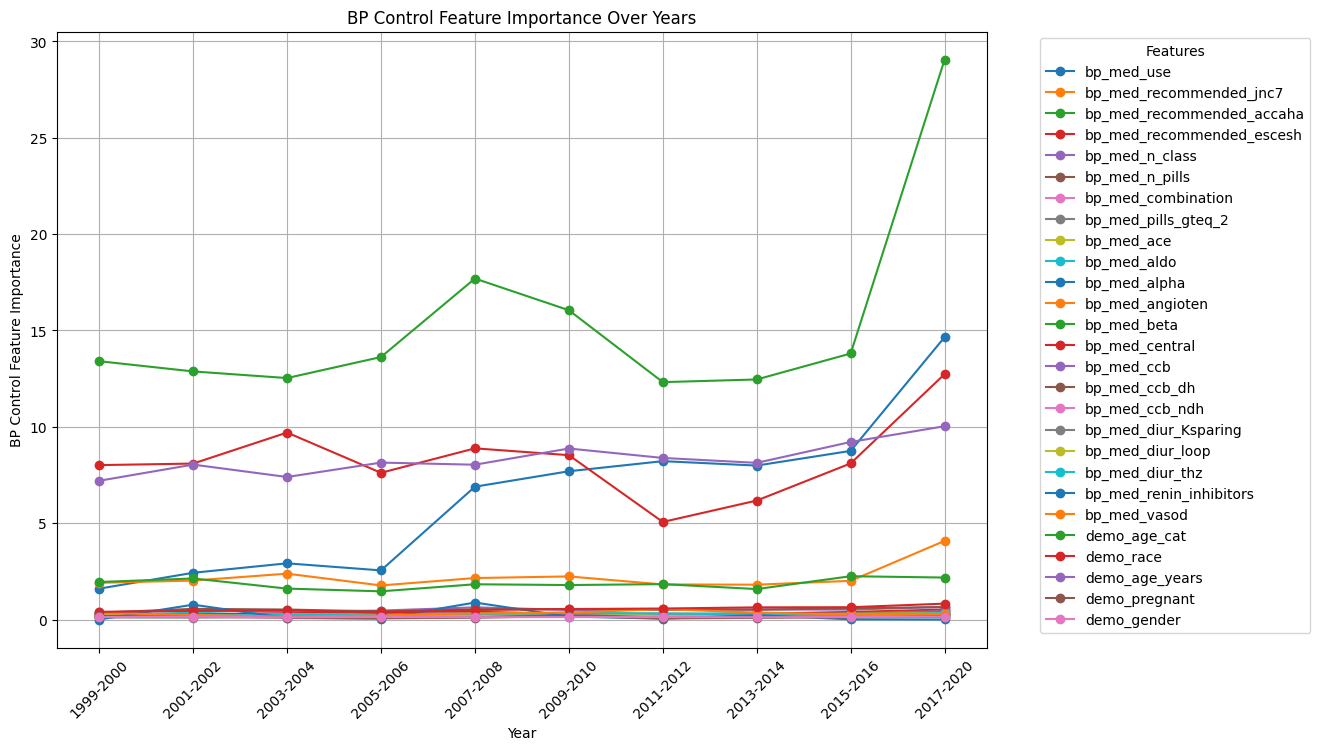

In [40]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance_df' is your DataFrame
plt.figure(figsize=(12, 8))

for feature in feature_importance_df.index:
    plt.plot(feature_importance_df.columns, feature_importance_df.loc[feature], marker='o', label=feature)

plt.xlabel('Year')
plt.ylabel('BP Control Feature Importance')
plt.title('BP Control Feature Importance Over Years')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


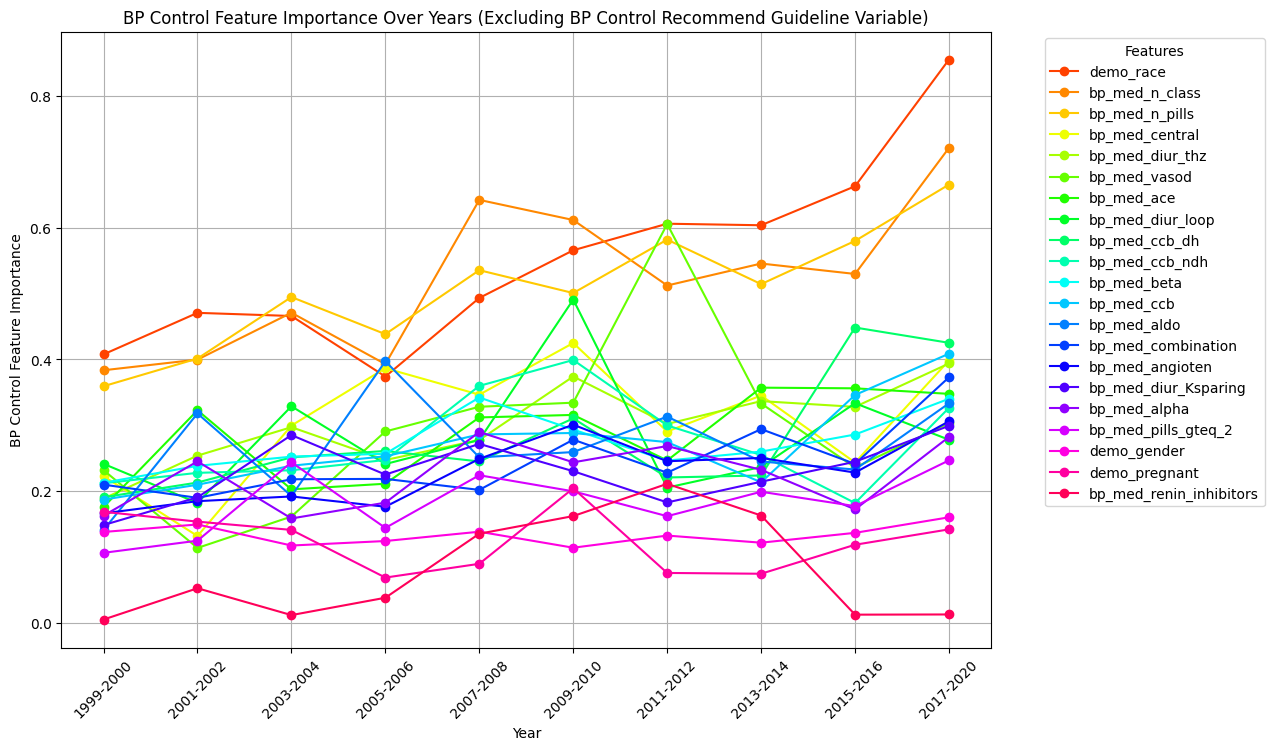

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance_df' is your DataFrame

# Calculate mean importance for each feature and sort
mean_importances = feature_importance_df.mean(axis=1)
sorted_features = mean_importances.sort_values(ascending=False)

# Exclude top 6 features
features_to_plot = sorted_features.iloc[6:].index

plt.figure(figsize=(12, 8))

# Use a palette with distinct colors
colors = sns.color_palette("hsv", len(features_to_plot))

# Plot only the remaining features with unique colors
for feature, color in zip(features_to_plot, colors):
    plt.plot(feature_importance_df.columns, feature_importance_df.loc[feature], marker='o', label=feature, color=color)

plt.xlabel('Year')
plt.ylabel('BP Control Feature Importance')
plt.title('BP Control Feature Importance Over Years (Excluding BP Control Recommend Guideline Variable)')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [41]:

"""

Comment off the code since categorical data not suitable correlation analysis


# Assuming df_by_year is a dictionary with year as key and corresponding DataFrame as value
# Assuming grouped_columns and bp_control_columns are defined as per your context

features = grouped_columns['bp_med']
targets = bp_control_columns

for year, df_year in df_by_year.items():
    # Prepare the data
    X = pd.get_dummies(df_year[features], columns=features)
    y = pd.get_dummies(df_year[targets], columns=targets)

    # Compute correlation
    corr_matrix = pd.concat([X, y], axis=1).corr().loc[X.columns, y.columns]

    # Plotting
    plt.figure(figsize=(10, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Feature-Target Correlation Heatmap for {year}')
    plt.xlabel('Targets')
    plt.ylabel('Features')
    plt.show()
"""

"\n\nComment off the code since categorical data not suitable correlation analysis\n\n\n# Assuming df_by_year is a dictionary with year as key and corresponding DataFrame as value\n# Assuming grouped_columns and bp_control_columns are defined as per your context\n\nfeatures = grouped_columns['bp_med']\ntargets = bp_control_columns\n\nfor year, df_year in df_by_year.items():\n    # Prepare the data\n    X = pd.get_dummies(df_year[features], columns=features)\n    y = pd.get_dummies(df_year[targets], columns=targets)\n\n    # Compute correlation\n    corr_matrix = pd.concat([X, y], axis=1).corr().loc[X.columns, y.columns]\n\n    # Plotting\n    plt.figure(figsize=(10, 20))\n    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')\n    plt.title(f'Feature-Target Correlation Heatmap for {year}')\n    plt.xlabel('Targets')\n    plt.ylabel('Features')\n    plt.show()\n"

In [42]:
features = ['bp_cat_meds_excluded','bp_cat_meds_included'] + grouped_columns['bp_med']
targets = bp_control_columns


for year, df_year in df_by_year.items():
    # Split the data into training and testing sets
    # print(df_year.columns)
    X = pd.get_dummies(df_year[features], columns=features)
    y = pd.get_dummies(df_year[targets], columns=targets)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train.columns = X_train.columns.str.replace("<", "_")
    # print(X_train.columns)
    # Train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)
    
    # Feature importance
    importance = model.feature_importances_
    print(f'In {year}:')
    for i, col in enumerate(X_train.columns):
        print(f'Importance of {col}: {importance[i]}')

In 1999-2000:
Importance of bp_cat_meds_excluded_SBP 160+ or DBP 100+ mm Hg: 3.6574332625605166e-05
Importance of bp_cat_meds_excluded_SBP _120 and DBP _80 mm Hg: 0.20374318957328796
Importance of bp_cat_meds_excluded_SBP of 120 to _130 and DBP _80 mm Hg: 0.18515805900096893
Importance of bp_cat_meds_excluded_SBP of 130 to _140 or DBP 80 to _90 mm Hg: 0.009868099354207516
Importance of bp_cat_meds_excluded_SBP of 140 to _160 or DBP 90 to _100 mm Hg: 2.1025876776548102e-05
Importance of bp_cat_meds_included_SBP 160+ or DBP 100+ mm Hg: 1.2593967539942241e-06
Importance of bp_cat_meds_included_SBP _120 and DBP _80 mm Hg: 8.796542942945962e-07
Importance of bp_cat_meds_included_SBP of 120 to _130 and DBP _ 80 mm Hg: 2.250077386634075e-06
Importance of bp_cat_meds_included_SBP of 130 to _140 or DBP 80 to _90 mm Hg: 0.0031960115302354097
Importance of bp_cat_meds_included_SBP of 140 to _160 or DBP 90 to _100 mm Hg: 7.850039764889516e-07
Importance of bp_cat_meds_included_taking antihypertens